## Predicting Chronic Kidney Disease in Patients
> Author: Matt Brems

We can sketch out the data science process as follows:
1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

In this lab, we're going to focus on steps exploring data, building models and evaluating the models we build.

There are three links you may find important:
- [A set of chronic kidney disease (CKD) data and other biological factors](./chronic_kidney_disease_full.csv).
- [The CKD data dictionary](./chronic_kidney_disease_header.txt).
- [An article comparing the use of k-nearest neighbors and support vector machines on predicting CKD](./chronic_kidney_disease.pdf).

## Step 1: Define the problem.

Suppose you're working for Mayo Clinic, widely recognized to be the top hospital in the United States. In your work, you've overheard nurses and doctors discuss test results, then arrive at a conclusion as to whether or not someone has developed a particular disease or condition. For example, you might overhear something like:

> **Nurse**: Male 57 year-old patient presents with severe chest pain. FDP _(short for fibrin degradation product)_ was elevated at 13. We did an echo _(echocardiogram)_ and it was inconclusive.

> **Doctor**: What was his interarm BP? _(blood pressure)_

> **Nurse**: Systolic was 140 on the right; 110 on the left.

> **Doctor**: It's an aortic dissection! Get to the OR _(operating room)_ now!

> _(intense music playing)_

In this fictitious scenario, you might imagine the doctor going through a series of steps like a [flowchart](https://en.wikipedia.org/wiki/Flowchart), or a series of if-this-then-that steps to diagnose a patient. The first steps made the doctor ask what the interarm blood pressure was. Because interarm blood pressure took on the values it took on, the doctor diagnosed the patient with an aortic dissection.

Your goal, as a research biostatistical data scientist at the nation's top hospital, is to develop a medical test that can improve upon our current diagnosis system for [chronic kidney disease (CKD)](https://www.mayoclinic.org/diseases-conditions/chronic-kidney-disease/symptoms-causes/syc-20354521).

**Real-world problem**: Develop a medical diagnosis test that is better than our current diagnosis system for CKD.

**Data science problem**: Develop a medical diagnosis test that reduces both the number of false positives and the number of false negatives.

---

## Step 2: Obtain the data.

### 1. Read in the data.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('chronic_kidney_disease_full.csv')
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


In [8]:
df.shape

(400, 25)

### 2. Check out the data dictionary. What are a few features or relationships you might be interested in checking out?

In [9]:
# Answer here:
# diabetes mellitus - dm
# blood pressure - bp

---

## Step 3: Explore the data.

### 3. How much of the data is missing from each column?

In [10]:
# Answer here:
df.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

### 4. Suppose that I dropped every row that contained at least one missing value. (In the context of analysis with missing data, we call this a "complete case analysis," because we keep only the complete cases!) How many rows would remain in our dataframe? What are at least two downsides to doing this?

In [11]:
# Answer here:
# There are 242, e.g., 60.5%, incompleted rows. The remaining data will be 158 rows.
# Downsides
# 1) Loss many data
# 2) Bias, if certain group of data is missing, not random

missing_count = df.isnull().any(axis = 1).sum()
missing_count

242

### 5. Thinking critically about how our data were gathered, it's likely that these records were gathered by doctors and nurses. Brainstorm three potential areas (in addition to the missing data we've already discussed) where this data might be inaccurate or imprecise.

In [12]:
# Answer here:
# The majority of missing data are from rbc, wbcc, and rbcc; maybe the patients didn't have blood test.
# Other reasons:
# 1) Measurement errors, wrong units, broken machine
# 2) Inconsistent data entry because the data is collected by many peoples
# 3) Incompleted patient history, so the data may not true

---

## Step 4: Model the data.

### 6. Suppose that I want to construct a model where no person who has chronic kidney disease (CKD) will ever be told that they do not have CKD. What (very simple, no machine learning needed) model can I create that will never tell a person with CKD that they do not have CKD?

> Hint: Don't think about `statsmodels` or `scikit-learn` here.

In [13]:
# Answer here:
# Just tell all the patients, 'you have CKD'

### 7. In problem 6, what common classification metric did we optimize for? Did we minimize false positives or negatives?

In [14]:
# Answer here:
# The problem 6 is trying to avoid False Negative (tell the patient that you're fine but actually not)
# So, in this case, false negative is going to be optimized

### 8. Thinking ethically, what is at least one disadvantage to the model you described in problem 6?

In [15]:
# Answer here:
# If we tell every patient: 'you have CKD'; the patient may use all his/her savings.
# Leading to lower quality of life when the truth is revealed.

### 9. Suppose that I want to construct a model where a person who does not have CKD will ever be told that they do have CKD. What (very simple, no machine learning needed) model can I create that will accomplish this?

In [16]:
# Answer here:
# Just tell all the patients, 'you didn't have CKD'

### 10. In problem 9, what common classification metric did we optimize for? Did we minimize false positives or negatives?

In [17]:
# Answer here:
# The prolem 9 is trying to avoid False Positive (tell the patient that you're not fine but actually not)

### 11. Thinking ethically, what is at least one disadvantage to the model you described in problem 9?

In [18]:
# Answer here:
# The patients will die, and don't know why they died

### 12. Construct a logistic regression model in `sklearn` predicting class from the other variables. You may scale, select/drop, and engineer features as you wish - build a good model! Make sure, however, that you include at least one categorical/dummy feature and at least one quantitative feature.

> Hint: Remember to do a train/test split!

#### Cleaning

In [19]:
pd.DataFrame({ 'Data Type': df.dtypes, 'Missing Values': df.isnull().sum(), '% Missing Values': df.isnull().mean().mul(100)})

,Data Type,Missing Values,% Missing Values
age,float64,9,2.25
bp,float64,12,3.00
sg,float64,47,11.75
al,float64,46,11.50
su,float64,49,12.25
rbc,object,152,38.00
pc,object,65,16.25
pcc,object,4,1.00
ba,object,4,1.00
bgr,float64,44,11.00


In [20]:
# df.groupby('class')['rbc'].value_counts(dropna = False)
# class   rbc     
# ckd     NaN         143
#         normal       60
#         abnormal     47
# notckd  normal      141
#         NaN           9

# df.groupby('class')['pc'].value_counts(dropna = False)
# class   pc      
# ckd     normal      118
#         abnormal     76
#         NaN          56
# notckd  normal      141
#         NaN           9

# The missingness of the `rbc` and `pc` columns primarily originates from the class `ckd`. 
# I have decided to drop these two columns because the `rbcc` and `pcv` columns will cover this information.

df.drop(columns=['rbc', 'pc'], inplace = True, errors = 'ignore')

In [21]:
# Other variables of type 'object' have less number of 'NaN'
# We will impute them with the mode of each class group

impute_mode_cols = ['pcc','ba','htn','dm','cad','appet','pe','ane']

for col in impute_mode_cols:
    df[col] = df.groupby('class')[col].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else None))

In [22]:
# In the other hand, variables of type 'float' will be imputed them with the median of each class group

impute_median_cols = ['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc']

for col in impute_median_cols:
    df[col] = df.groupby('class')[col].transform(lambda x: x.fillna(x.median()))

In [23]:
# For checking no null in our dataframe
df.isnull().sum()[df.isnull().sum() != 0 ]

Series([], dtype: int64)

In [24]:
# Some variables are binary choices, but in the form of strings.
# We format them in 1 and 0.

# pcc, ba: present = 1, notpresent = 0
# htn, dm, cad, pe, ane: yes = 1, no = 0
# appet: good = 1, poor = 0
# class: ckd = 1, notckd = 0

# Create dictionaries for mapping
dict_pnp = { 'present': 1, 'notpresent': 0 }
dict_yn = { 'yes': 1 ,  'no': 0}
dict_gp = { 'good': 1, 'poor': 0 }
dict_ckd = { 'ckd': 1 , 'notckd': 0  }

In [25]:
# Mapping

df['pcc'] = df['pcc'].map(dict_pnp)
df['ba'] = df['ba'].map(dict_pnp)
df['htn'] = df['htn'].map(dict_yn)
df['dm'] = df['dm'].map(dict_yn)
df['cad'] = df['cad'].map(dict_yn)
df['appet'] = df['appet'].map(dict_gp)
df['pe'] = df['pe'].map(dict_yn)
df['ane'] = df['ane'].map(dict_yn)
df['class'] = df['class'].map(dict_ckd)

In [26]:
df.head()

,age,bp,sg,al,su,pcc,ba,bgr,bu,sc,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,0,0,121.0,36.0,1.2,...,44.0,7800.0,5.2,1,1,0,1,0,0,1
1,7.0,50.0,1.020,4.0,0.0,0,0,143.5,18.0,0.8,...,38.0,6000.0,3.9,0,0,0,1,0,0,1
2,62.0,80.0,1.010,2.0,3.0,0,0,423.0,53.0,1.8,...,31.0,7500.0,3.9,0,1,0,0,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,117.0,56.0,3.8,...,32.0,6700.0,3.9,1,0,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,0,0,106.0,26.0,1.4,...,35.0,7300.0,4.6,0,0,0,1,0,0,1


#### Model

In [59]:
# Import Library

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# ------------------------------------------------------------------------------------------------------------------------------------------------------

X = df.drop(columns = ['class'])                                              # Set features
y = df['class']                                                               # Set target

X_train, X_test, y_train, y_test = train_test_split(X
                                                    , y
                                                    , test_size = 0.2
                                                    , random_state = 42
                                                    , stratify = y
                                                   )                          # Split to train and test sets


# ------------------------------------------------------------------------------------------------------------------------------------------------------
# Instantiate pipeline with standard scaler and logistic regression
# I do not want to scale binary columns, ChatGPT suggests to use ColumnTransformer from sklearn.compose

continuous_cols = ['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc']
pipe = Pipeline([('preprocessor', ColumnTransformer(transformers = [('scaler', StandardScaler(), continuous_cols)     # Scale only some columns
                                                                    #, ('encoder', OneHotEncoder(), categorical_cols)
                                                                   ]
                                                    , remainder = 'passthrough' # Other columns still the sames
                                                   )
                 )
                 , ('logreg', LogisticRegression())
])

# Parameter for optimize logistic regression via grid search

param_grid = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100]
    , 'logreg__penalty': ['l1', 'l2']
    , 'logreg__solver': ['liblinear']
    , 'logreg__random_state': [42]
}

# ------------------------------------------------------------------------------------------------------------------------------------------------------
# Apply Grid Search

grid_search = GridSearchCV(pipe, param_grid, cv = 5, scoring = 'accuracy', verbose = 1)

grid_search.fit(X_train, y_train)

In [32]:
# Best parameters, and their score

print("Best parameters: ", grid_search.best_params_)       # {'logistic__C': 10, 'logistic__penalty': 'l2', 'logistic__solver': 'liblinear'}
print("Best Score: ", grid_search.best_score_)             # 0.9875  Almost perfect

Best parameters:  {'logreg__C': 100, 'logreg__penalty': 'l1', 'logreg__random_state': 42, 'logreg__solver': 'liblinear'}
Best Score:  0.9875


In [33]:
best_model = grid_search.best_estimator_.named_steps['logreg']          # This code is for extract the best model from grid search

coefficients = best_model.coef_[0]                                      # Get coefficient from the best model
intercept = best_model.intercept_[0]                                    # Get intercept from the best model
feature_names = X.columns                                               # Get feature names from the original DataFrame

coeff_df = pd.DataFrame({'Feature': feature_names
                         , 'Coefficient': coefficients}
                       )                                                # Make as DataFrame for readability

print("Best Coefficients with Feature Names:")
print(coeff_df)

print("Best Intercept:", intercept)

Best Coefficients with Feature Names:
   Feature  Coefficient
0      age    -0.152108
1       bp     0.775497
2       sg    -4.260803
3       al     0.681433
4       su     1.564811
5      pcc     3.303806
6       ba    -1.185609
7      bgr     4.178391
8       bu     0.000000
9       sc    -0.636154
10     sod    -4.880684
11     pot    -1.686393
12    hemo    -0.417253
13     pcv    -4.776822
14    wbcc     0.000000
15    rbcc     0.000000
16     htn     9.201213
17      dm     4.783162
18     cad     0.000000
19   appet     0.000000
20      pe     0.000000
21     ane     0.000000
Best Intercept: 6.185408163724013


In [34]:
y_pred_test = grid_search.best_estimator_.predict(X_test)               # Predict X_test with the best model from Grid Search
accuracy_score(y_test, y_pred_test)                                     # Accuracy Score = 0.9625

0.9625

---

## Step 5: Evaluate the model.

### 13. Based on your logistic regression model constructed in problem 12, interpret the coefficient of one of your quantitative features.

In [38]:
# Recall that the value of bp and sg are standard scaled.
# 1       bp     0.775497
# 2       sg    -4.260803

# bp has positive coefficient of 0.775497 means:
# If bp increases by 1 standard scale unit, or 1 std in real unit,
# then the log-odds of the having ckd will increase by 0.775497;
# In term of odds ratio: np.exp(0.775497) ~ 2.17:
# This means, assuming other variables are constant;
# for each 1 increase in standard scale unit, or 1 std in real unit,
# the chance of having ckd will be 2.17 times higher.

# sg has negative coefficient of -4.260803 means:
# If sg increases by 1 standard scale unit, or 1 std in real unit,
# then the log-odds of the having ckd will decrease by 4.260803;
# In term of odds ratio: np.exp(-4.260803) ~ 0.01:
# This means, assuming other variables are constant;
# for each 1 increase in standard scale unit, or 1 std in real unit,
# the chance of having ckd will be 0.01 times original odds.

np.exp(0.775497), np.exp(-4.260803)

(2.171671179592965, 0.014110966753203976)

### 14. Based on your logistic regression model constructed in problem 12, interpret the coefficient of one of your categorical/dummy features.

In [40]:
# 17      dm     4.783162

# If patient have diabetes, then the log-odds of the having ckd will increase by 4.783162;
# In other word, the chance of having ckd will be np.exp(4.783162) ~ 119 times higher.

np.exp(4.783162)

119.48155404489826

### 15. Despite being a relatively simple model, logistic regression is very widely used in the real world. Why do you think that's the case? Name at least two advantages to using logistic regression as a modeling technique.

In [41]:
# Answer:
# 1. Interpretability: 
# Since Logistic Regression is parametric classification model, 
# the coefficients of model will tell the impact of each variable to outcomes
# 2. Robustness
# Logistic Regression can handle outlilers, since it has regualarized by Ridge and Lasso.

### 16. Does it make sense to generate a confusion matrix on our training data or our test data? Why?

> Hint: Once you've generated your predicted $y$ values and you have your observed $y$ values, then it will be easy to [generate a confusion matrix using sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

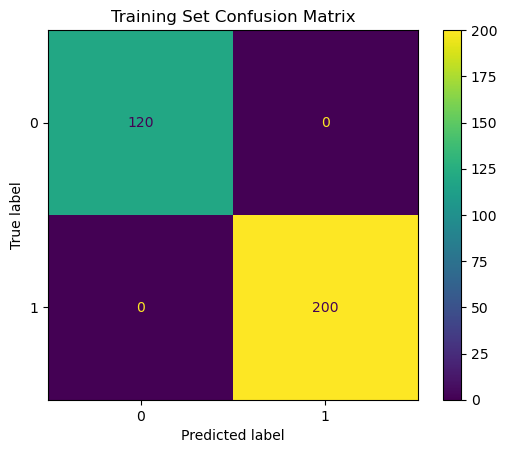

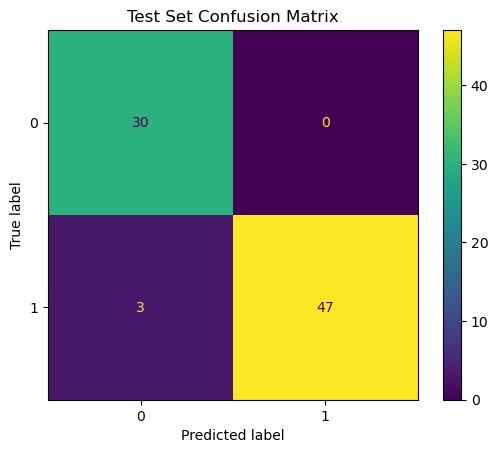

In [51]:
# Yes, the confusion matrix not only tell the accuracy of model; 
# it also tell the sensitivity and specificity for dectect the false positive and false negative value

# Confusion Matrix

# Predict on the training set
y_pred_train = grid_search.best_estimator_.predict(X_train)
cf_train = confusion_matrix(y_train, y_pred_train)
ConfusionMatrixDisplay(confusion_matrix = cf_train, display_labels = best_model.classes_).plot()
plt.title("Training Set Confusion Matrix")

# Predict on the test set
y_pred_test = grid_search.best_estimator_.predict(X_test)
cf_test = confusion_matrix(y_test, y_pred_test)
ConfusionMatrixDisplay(confusion_matrix = cf_test, display_labels = best_model.classes_).plot()
plt.title("Test Set Confusion Matrix")

plt.show()

### 17. In this hospital case, we want to predict CKD. Do we want to optimize for sensitivity, specificity, or something else? Why? (If you don't think there's one clear answer, that's okay! There rarely is. Be sure to defend your conclusion!)

In [ ]:
# Answer:
# Both false positives and false negatives are bad
# A false positive can lead to unnecessary suffering for the patient, 
# while a false negative may cause the patient to become careless about their health.

### 18 (BONUS). Write a function that will create an ROC curve for you, then plot the ROC curve.

Here's a strategy you might consider:
1. In order to even begin, you'll need some fit model. Use your logistic regression model from problem 12.
2. We want to look at all values of your "threshold" - that is, anything where .predict() gives you above your threshold falls in the "positive class," and anything that is below your threshold falls in the "negative class." Start the threshold at 0.
3. At this value of your threshold, calculate the sensitivity and specificity. Store these values.
4. Increment your threshold by some "step." Maybe set your step to be 0.01, or even smaller.
5. At this value of your threshold, calculate the sensitivity and specificity. Store these values.
6. Repeat steps 3 and 4 until you get to the threshold of 1.
7. Plot the values of sensitivity and 1 - specificity.

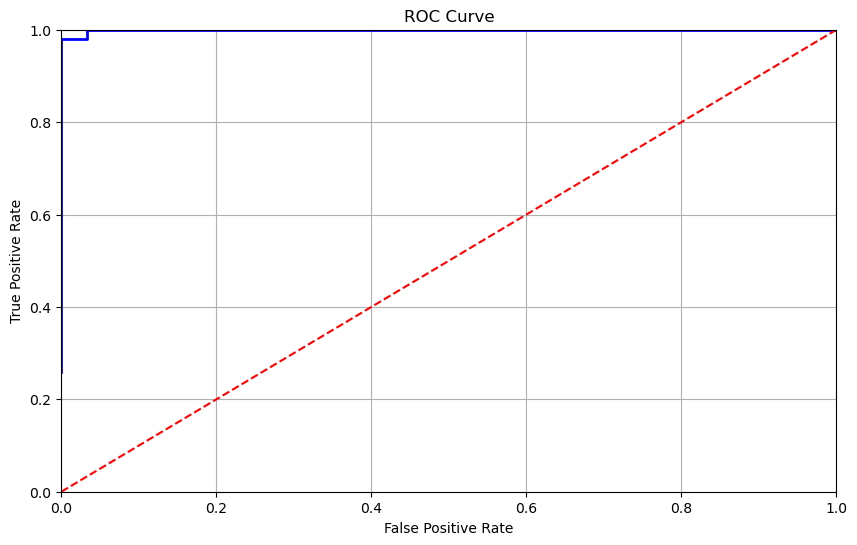

In [47]:
def plot_roc_curve(model, X, y):

    y_probs = model.predict_proba(X)[:, 1]                              # Get probabilities for the positive class
    
    thresholds = np.arange(0, 1.01, 0.01)                               # Thresholds from 0 to 1
    sensitivity = []
    specificity = []

    # Calculate sensitivity and specificity for each threshold
    for threshold in thresholds:
        y_pred = (y_probs >= threshold).astype(int)
        tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
        sensitivity.append(tp / (tp + fn))
        specificity.append(tn / (tn + fp))

    # Convert specificity to 1 - specificity
    false_positive_rate = [1 - spec for spec in specificity]

    # Plotting the ROC curve
    plt.figure(figsize=(10, 6))
    plt.plot(false_positive_rate, sensitivity, color = 'blue', lw = 2)
    plt.plot([0, 1], [0, 1], color = 'red', linestyle = '--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.grid()
    plt.show()

# Use the function
plot_roc_curve(grid_search.best_estimator_, X_test, y_test)


### 19. Suppose you're speaking with the biostatistics lead at Mayo Clinic, who asks you "Why are unbalanced classes generally a problem? Are they a problem in this particular CKD analysis?" How would you respond?

In [ ]:
# Answer:
# Model will hard to detect the positive class, if it never train the postive class
# or Model may bias to the majority of the trained data

### 20. Suppose you're speaking with a doctor at Mayo Clinic who, despite being very smart, doesn't know much about data science or statistics. How would you explain why unbalanced classes are generally a problem to this doctor?

In [ ]:
# Answer:
# If the model learns from only a small number of positive cases, 
# how will it detect them if it has rarely seen them before?

### 21. Let's create very unbalanced classes just for the sake of this example! Generate very unbalanced classes by [bootstrapping](http://stattrek.com/statistics/dictionary.aspx?definition=sampling_with_replacement) (a.k.a. random sampling with replacement) the majority class.

1. The majority class are those individuals with CKD.
2. Generate a random sample of size 200,000 of individuals who have CKD **with replacement**. (Consider setting a random seed for this part!)
3. Create a new dataframe with the original data plus this random sample of data.
4. Now we should have a dataset with around 200,000 observations, of which only about 0.00075% are non-CKD individuals.

In [50]:
# Sample 200_000 from class = 1 (having ckd)

ckd_sample = df[df['class'] == 1].sample(n = 200_000, replace = True, random_state = 42)

# Concatenate with original data

unbalanced_df = pd.concat([df, ckd_sample])

# Check the distribution of classes in the new dataset

print(unbalanced_df['class'].value_counts(normalize = True) * 100)

class
1    99.92515
0     0.07485
Name: proportion, dtype: float64


### 22. Build a logistic regression model on the unbalanced class data and evaluate its performance using whatever method(s) you see fit. How would you describe the impact of unbalanced classes on logistic regression as a classifier?
> Be sure to look at how well it performs on non-CKD data.

In [57]:
X = unbalanced_df.drop(columns = ['class'])                                              # Set features
y = unbalanced_df['class']                                                               # Set target

X_train, X_test, y_train, y_test = train_test_split(X
                                                    , y
                                                    , test_size = 0.2
                                                    , random_state = 42
                                                    , stratify = y
                                                   )                          # Split to train and test sets

continuous_cols = ['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc']
pipe = Pipeline([('preprocessor', ColumnTransformer(transformers = [('scaler', StandardScaler(), continuous_cols)     # Scale only some columns
                                                                    #, ('encoder', OneHotEncoder(), categorical_cols)
                                                                   ]
                                                    , remainder = 'passthrough' # Other columns still the sames
                                                   )
                 )
                 , ('logreg', LogisticRegression())
])

# Parameter for optimize logistic regression via grid search

param_grid = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100]
    , 'logreg__penalty': ['l1', 'l2']
    , 'logreg__solver': ['liblinear']
    , 'logreg__random_state': [42]
}

# ------------------------------------------------------------------------------------------------------------------------------------------------------
# Apply Grid Search

grid_search = GridSearchCV(pipe, param_grid, cv = 5, scoring = 'accuracy', verbose = 1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'bp',
                                                                          'sg',
                                                                          'al',
                                                                          'su',
                                                                          'bgr',
                                                                          'bu',
                                                                          'sc',
                                                                          'sod',
                                                                          'pot',
                                                                          'hemo',
                                                                          'pcv',
                                                                          'wbcc',
                                                                          'rbcc'])])),
                                       ('logreg', LogisticRegression())]),
             param_grid={'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'logreg__penalty': ['l1', 'l2'],
                         'logreg__random_state': [42],
                         'logreg__solver': ['liblinear']},
             scoring='accuracy', verbose=1)

In [60]:
y_pred_test = grid_search.best_estimator_.predict(X_test)               # Predict X_test with the best model from Grid Search
accuracy_score(y_test, y_pred_test)                                     # Accuracy Score = 0.9625

0.9999750499001996

Accuracy: 0.9999750499001996
Precision: 0.9999750318344112
Recall: 1.0
F1 Score: 0.9999875157613513


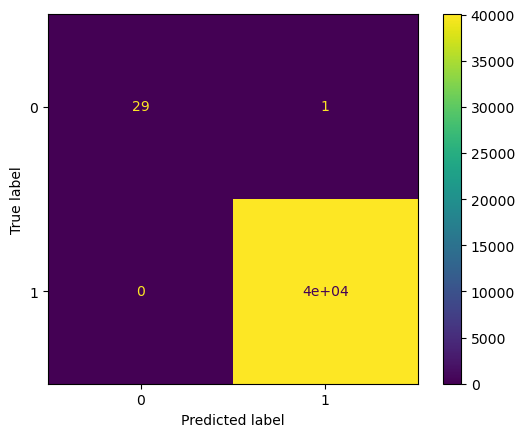

In [63]:
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, pos_label=1)
recall = recall_score(y_test, y_pred_test, pos_label=1)
f1 = f1_score(y_test, y_pred_test, pos_label=1)
conf_matrix = confusion_matrix(y_test, y_pred_test)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

best_model = grid_search.best_estimator_.named_steps['logreg']
ConfusionMatrixDisplay(conf_matrix, display_labels = best_model.classes_).plot();

In [64]:
# All metrics look good, but mislead
# Because the model works well with majority class, and dominate all metrics to almost 1

---

## Step 6: Answer the problem.

At this step, you would generally answer the problem! In this situation, you would likely present your model to doctors or administrators at the hospital and show how your model results in reduced false positives/false negatives. Next steps would be to find a way to roll this model and its conclusions out across the hospital so that the outcomes of patients with CKD (and without CKD!) can be improved!

In [65]:
# Our model (the balanced data) works well.
# False negative only 3 / 80, False positive 0.
# Accuracy 77 /80